‫‪4‬‬‫‪-‬‬‫بر‬ ‫تمامی‬ ‫تصاویر‬ ‫با‬ ‫اعمال‬ ‫فیلتر‬ ‫ها‬ ‫و‬ ‫روش‬ ‫های‬ ‫مختلف‬ ‫(لبه‬ ‫یابی‪،‬‬‫آستانه‬ ‫گذاری‬‫و‬ ‫‪،)...‬‬
‫‪Segmentation‬‬‫انجام‬ ‫دهید‪.‬‬

In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# get image
image = cv2.imread('assignment/Hard/288024.jpg', cv2.IMREAD_GRAYSCALE)
# image = cv2.imread('assignment/Easy/113044.jpg', cv2.IMREAD_GRAYSCALE)


(321, 481)

# Thresholding

In [53]:
# Global Thresholding
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
# _, global_thresh2 = cv2.threshold(global_thresh, 127, 127, cv2.THRESH_BINARY)

In [54]:
# Apply Gaussian Blur to remove noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0.01)

# Apply Otsu's Thresholding
# The second parameter is set to 0 to let Otsu'' method determine the optimal threshold value
otsu_thresh, otsu_result = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(otsu_thresh)


141.0


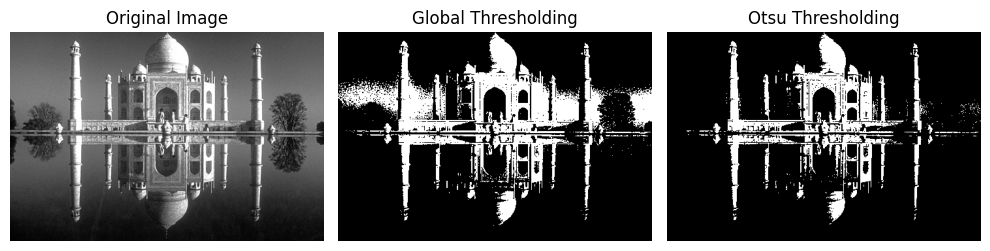

In [56]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Global Thresholding')
plt.imshow(global_thresh, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Otsu Thresholding')
plt.imshow(otsu_result, cmap='gray')
plt.axis('off')

plt.tight_layout()

# Edge-based segmentation

In [32]:
image2 = cv2.imread('assignment/Easy/118035.jpg', cv2.IMREAD_GRAYSCALE)

In [48]:
# Apply Sobel filter
sobel_x = cv2.Sobel(image2, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image2, cv2.CV_64F, 0, 1, ksize=3)

# Calculate gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_magnitude = np.uint8(gradient_magnitude)

# Apply thresholding
_, edges = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)


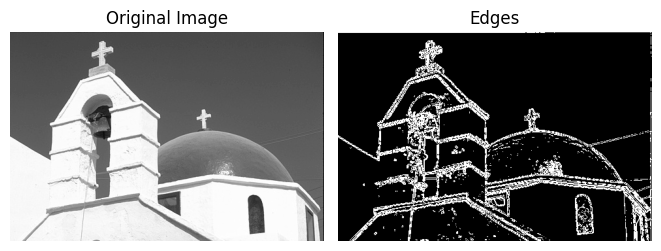

In [49]:
image2 = cv2.imread('assignment/Easy/118035.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image2, cmap='gray')
plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.title('Global Thresholding')
# plt.imshow(global_thresh, cmap='gray')
# plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()

## Edge Detection using laplace operator

In [3]:
# from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [27]:
image_gray = cv2.imread('assignment/Easy/church.jpg', cv2.IMREAD_GRAYSCALE)

In [28]:
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

In [29]:
output = ndimage.convolve(image_gray, kernel_laplace, mode='reflect')
out_h = ndimage.convolve(image_gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(image_gray, sobel_vertical, mode='reflect')


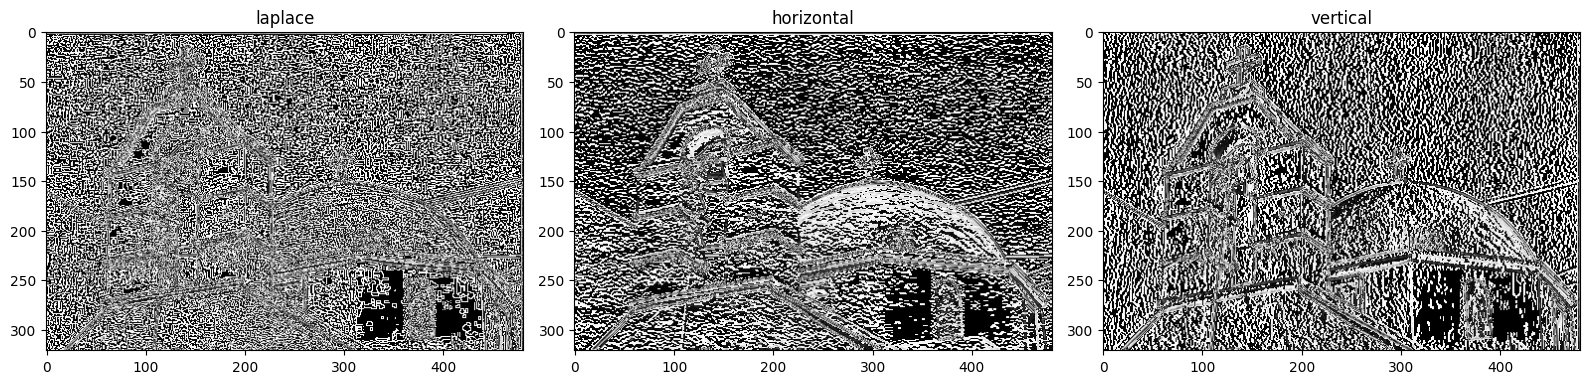

In [30]:
figure, axis = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

axis[0].imshow(output, cmap='gray')
axis[0].set_title('laplace')

axis[1].imshow(out_h, cmap='gray')
axis[1].set_title('horizontal')

axis[2].imshow(out_v, cmap='gray')
axis[2].set_title('vertical')


figure.tight_layout()

# Clustering-based Image Segmentation

In [135]:
# image = cv2.imread('assignment/Easy/church.jpg') /255
image = cv2.imread('assignment/Hard/288024.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255

In [136]:
pic_n = image.reshape(image.shape[0]*image.shape[1], image.shape[2])

In [149]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

In [150]:
cluster_pic = pic2show.reshape(image.shape[0], image.shape[1], image.shape[2])

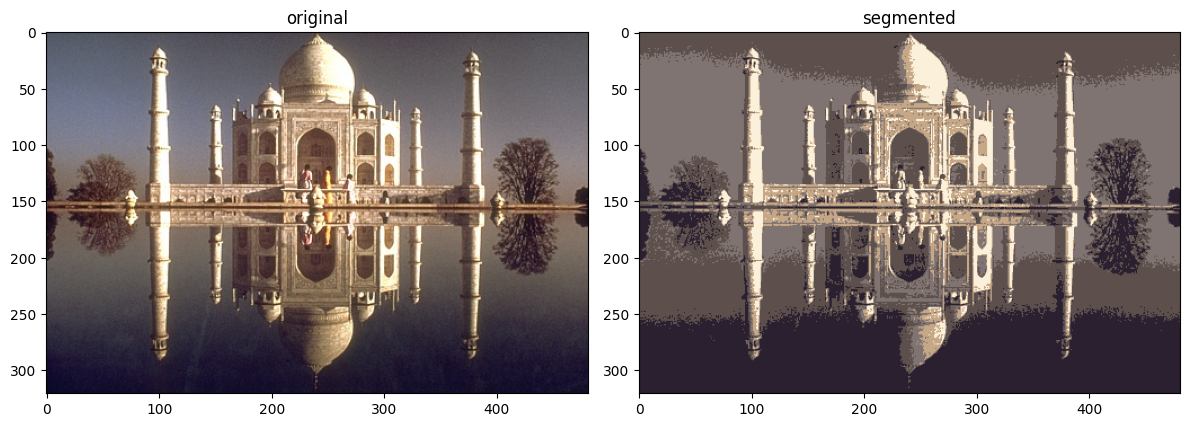

In [151]:
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

axis[0].imshow(image)
axis[0].set_title('original')

axis[1].imshow(cluster_pic)
axis[1].set_title('segmented')


figure.tight_layout()